In [1]:
import pandas as pd
import glob
import nltk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

/work/modules/Ubuntu/14.04/amd64/common/anaconda3/5.1.0/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
# Fetching metaData files

metaData = pd.read_csv('ReasearchProjectData/ecco_tcp-metadata.csv', error_bad_lines=False, low_memory=False)
perPage = pd.read_csv('ReasearchProjectData/per_page_df_ecco_conf.csv', error_bad_lines=False)

In [3]:
#Fetching all the text files

difference = []
path = 'ReasearchProjectData/by_page_csv/'
folders = [f for f in glob.glob(path + "**/*.csv", recursive=True)]

In [10]:
results = None
for f in folders:
    difference.append(baseFunction(f))
results = get_errors(difference)

In [9]:
def baseFunction(f):
    diffe = []
    perPageText = pd.read_csv(f, error_bad_lines=False)
    perPageText = perPageText.sort_values(['page'])
    
    tokens_ocr = fetch_tokens(perPageText.ocr)
    tokens_tcp = fetch_tokens(perPageText.tcp)
    
    token_ocr_count = get_token_length(tokens_ocr)
    token_tcp_count = get_token_length(tokens_tcp)
    
    diffe.append(get_token_diff(token_ocr_count, token_tcp_count))
    return diffe

In [5]:
def fetch_tokens(textPage):
    tokens = []
    i = 0
    while i < len(textPage):
        tokens.append(nltk.RegexpTokenizer(r'\w+').tokenize(textPage[i]))
        i += 1
    return tokens

In [6]:
def get_token_length(tokens):
    token_length = []
    j = 0
    while j < len(tokens):
        token_length.append(len(tokens[j]))
        j += 1
    token_length = np.array(token_length)
    return token_length

In [7]:
def get_token_diff(count_ocr, count_tcp):
    diff = []
    if (count_ocr.size == count_tcp.size):
        diff.append([abs(a - b) > 10 for a,b in zip(count_ocr, count_tcp)])
    return diff

In [8]:
def get_errors(difference):
    errors = []
    coef = np.array(difference).ravel()
    for diff in coef:
        errors.append([sum(diff), len(diff)])
    return errors

In [11]:
len(results)

2386

In [12]:
accuracy = len(results)

In [13]:
print(results[0])

[33, 335]


In [14]:
lst2 = [result[0]/result[1]*100 for result in results]

In [15]:
ocred = [result[0] for result in results]
actual = [result[1] for result in results]

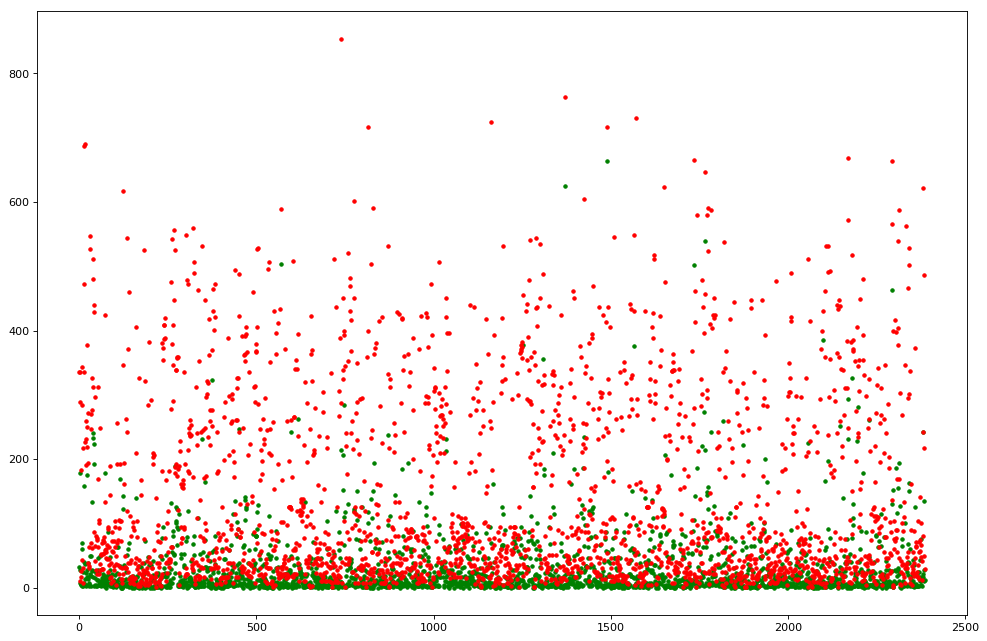

In [17]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(ocred,'g*', actual, 'ro', marker='.')
plt.show()

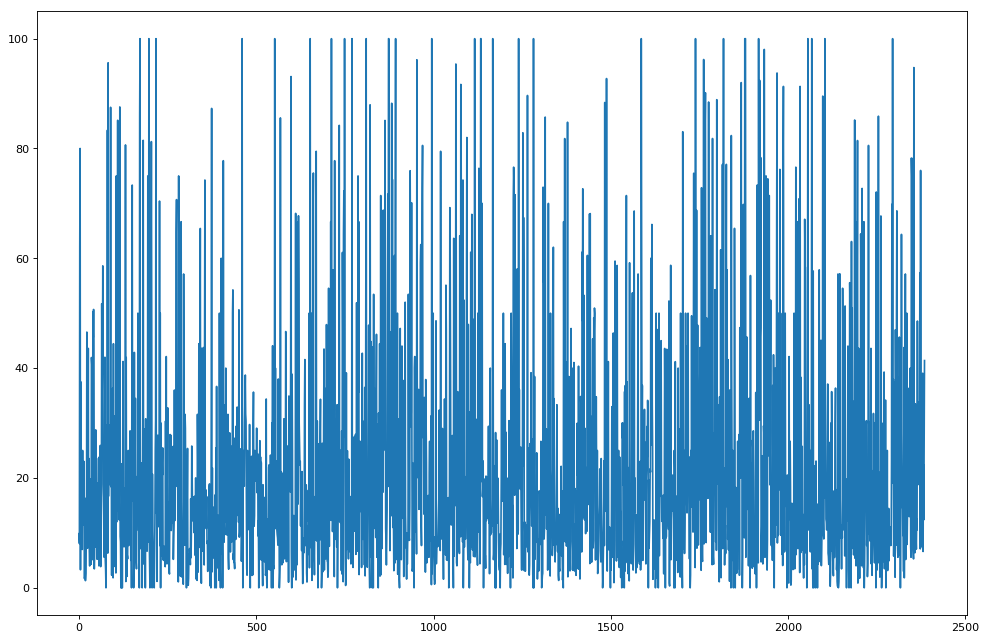

In [18]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(lst2)
plt.show()

In [61]:
results = None